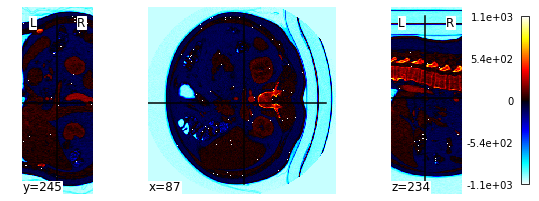

In [3]:
from nilearn import plotting

plotting.plot_stat_map('./data/imaging.nii.gz')


In [ ]:
import pydicom
import nibabel as nib
def normalize(volume,hu_min,hu_max):
    if hu_min is not None or hu_max is not None:
        volume = np.clip(volume,hu_min,hu_max)

    mxval = np.max(volume)
    mnval = np.min(volume)
    im_volume = (volume - mnval)/max(mxval - mnval, 1e-3)
    return im_volume

vol_nii = nib.load('data/imaging.nii.gz')
# seg_nii = nib.load('data/segmentation.nii.gz')

vol = vol_nii.get_data()
vol = normalize(vol, -512, 512)

ds = pydicom.dcmread('data/test.dcm')
vol = vol.astype('int16')
ds.PixelData = vol.tostring()
ds.Rows, ds.Columns = vol.shape

rs = ds.pixel_array
plt.imshow(rs, 'gray')
ds.save_as('')


